In [2]:
import json

with open("../../../blockchain.json",'r') as f:
    data = json.load(f)

In [5]:
# Create a dictionary to store honesty values for each nodeId
honesty_values_dict = {}

# Iterate through the transactions of all blocks
for json_obj in data:
    for transaction in json_obj['Transactions']:
        if transaction['Content']['message_type'] == 1:
            node_id = transaction['Content']['nodeId']
            honesty = transaction['Content']['honesty']

            if node_id not in honesty_values_dict:
                honesty_values_dict[node_id] = []

            honesty_values_dict[node_id].append(honesty)

# Print honesty values for each node in a single line
for node_id in range(1, 101):  # Assuming node IDs are from 1 to 100
    if node_id in honesty_values_dict:
        honesty_list = honesty_values_dict[node_id]
        print(f"Node {node_id}: {honesty_list}")
    else:
        print(f"Node {node_id}: No honesty values")


Node 1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.36, 0.36, 0.36, 0.36, 0.36, 0.36, 0.36, 0.36, 0.36]
Node 2: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.981, 1.925, 1.925, 11.925, 12.864, 12.864, 13.802, 13.802, 14.744, 0.0, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2]
Node 3: [13.997, 14.168, 14.168, 14.326, 15.268, 15.268, 15.268, 15.268, 16.212, 16.212, 16.212, 17.157, 17.157, 27.157, 26.936, 26.936, 27.023, 27.023, 27.023, 0.0, 0.933, 0.933, 0.933, 0.933, 0.933, 0.933, 0.933, 0.933, 0.933]
Node 4: [12.78, 13.166, 13.166, 13.6, 13.6, 13.6, 13.6, 13.6, 13.6, 13.6, 13.6, 14.557, 14.557, 24.557, 24.778, 24.778, 25.039, 25.039, 25.296, 0.0, 0.946, 0.946, 0.946, 0.946, 0.946, 0.946, 0.946, 0.946, 0.946]
Node 5: [2.577, 3.533, 3.533, 13.533, 13.702, 13.702, 13.702, 13.702, 13.784, 13.784, 13.859, 14.811, 14.811, 24.811, 25.164, 25.164, 25.425, 25.425, 25.768, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
N

/tmp/ipykernel_15261/619480389.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


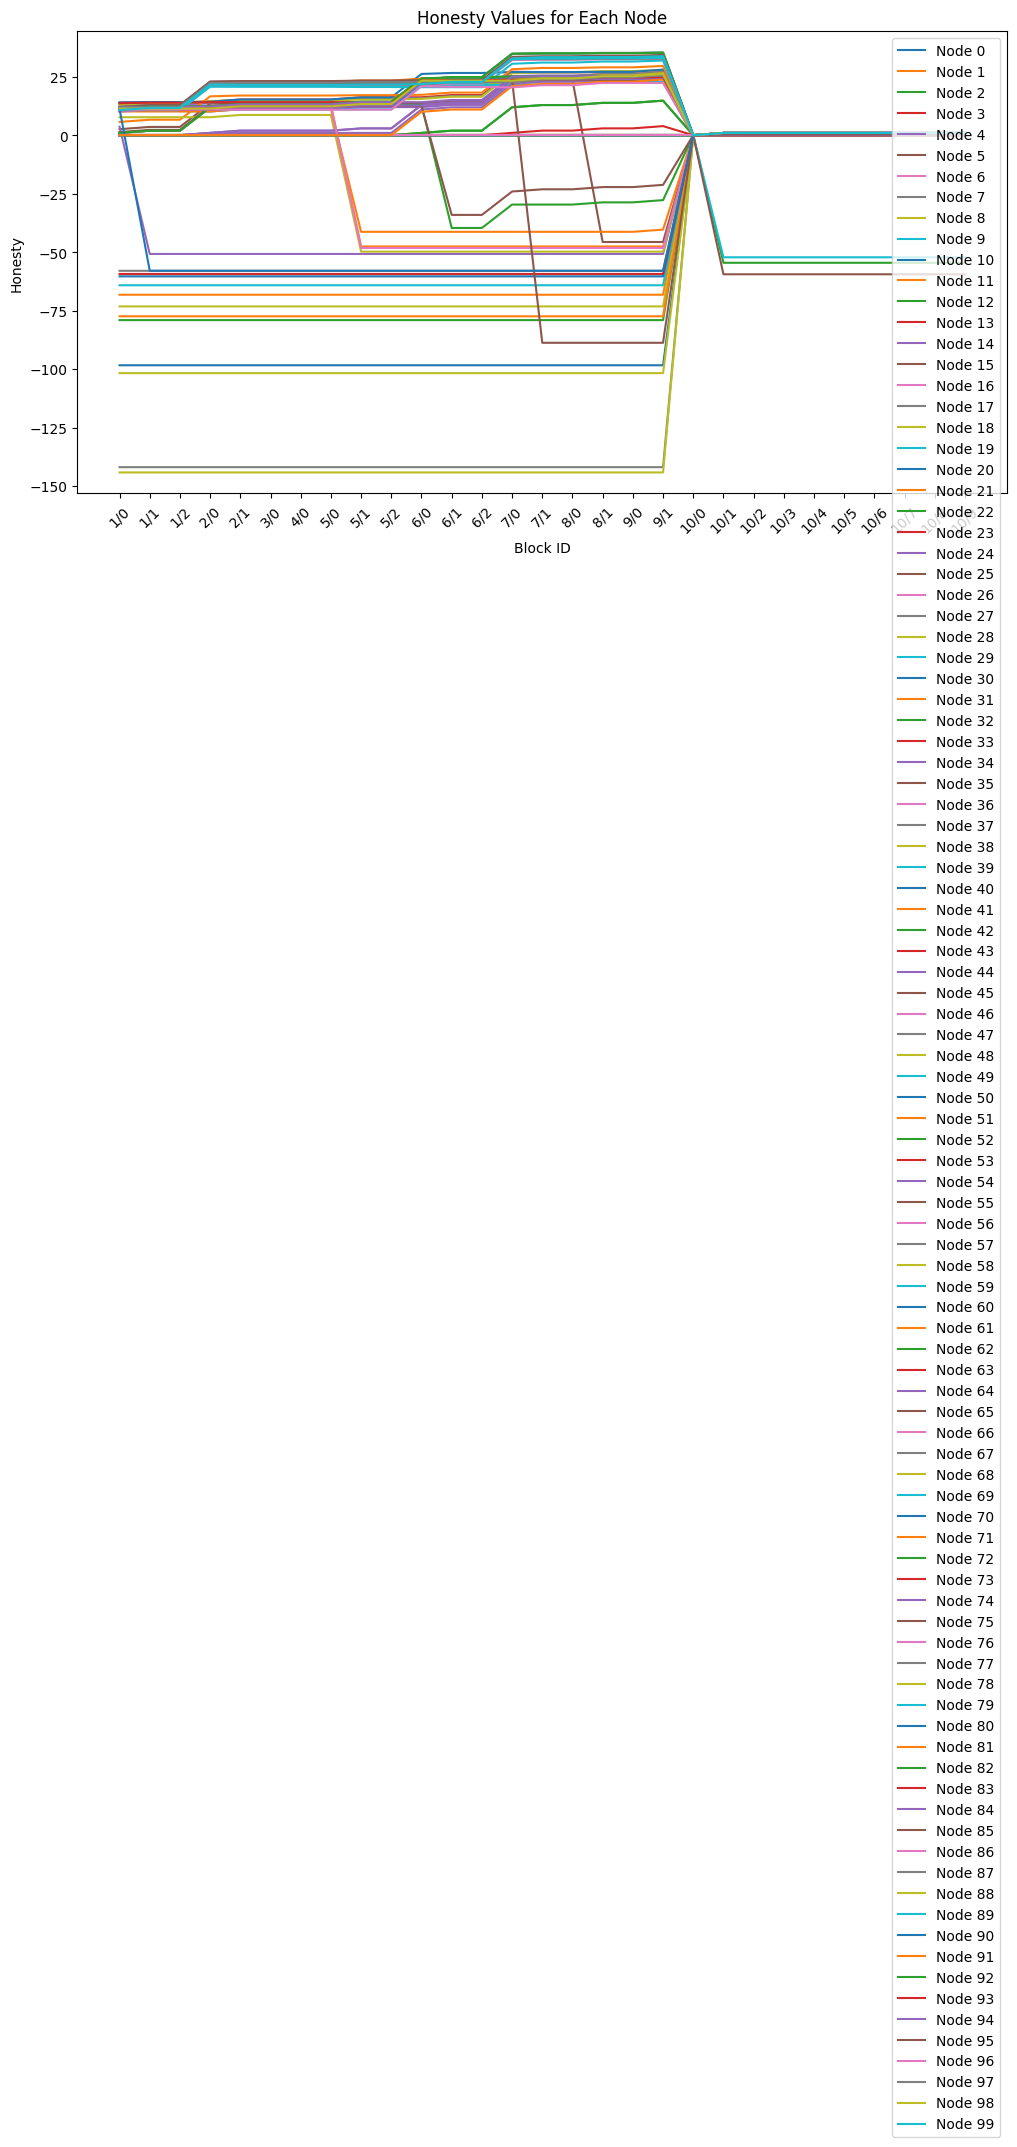

In [6]:
import matplotlib.pyplot as plt

# Prepare data for plotting
node_ids = sorted(honesty_values_dict.keys())
block_ids = [json_obj['BlockId'] for json_obj in data]

plt.figure(figsize=(12, 6))

# Plot honesty values for each node
for node_id in node_ids:
    honesty_values = honesty_values_dict[node_id]
    plt.plot(block_ids, honesty_values, label=f'Node {node_id}')

plt.xlabel('Block ID')
plt.ylabel('Honesty')
plt.title('Honesty Values for Each Node')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show or save the plot
plt.show()